# Task #6 : Prediction using Decision Tree Algorithm
# **Creater : Satvik**

## Predict the right class for new data using decision tree classifier and visualize classification.

● Create the Decision Tree classifier and visualize it graphically.\
● The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Import required libraries

In [1]:
# Importing all libraries required in this notebook
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Load Dataset
● Dataset : https://bit.ly/3kXTdox

In [19]:
# Reading data from remote link
# url = " https://bit.ly/3kXTdox"
# df = pd.read_csv(url)
# OR

# Reading data from csv file
# Removal of Id column as it is not required for data analysis i.e clustering
# df = pd.read_csv('Iris.csv').iloc[ : , 1:]
# OR

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print("Data imported successfully")

df.head()

Data imported successfully


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.shape

(150, 5)

In [21]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [22]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Separation of independent and dependent matrices

In [25]:
# Independent Matrix
X = df.iloc[:,:-1].values
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [26]:
# Dependent Matrix
y = df.iloc[ : , -1].values
y[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

### Handling of categorical data

In [27]:
from sklearn.preprocessing import LabelEncoder

y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Applying DecisionTreeClassifier algorithm

In [28]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Visualization of Classifier results
### Way 1: Textual tree

In [29]:
from sklearn import tree

text_tree = tree.export_text(classifier)
print(text_tree)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



### Way 2 : Decision tree

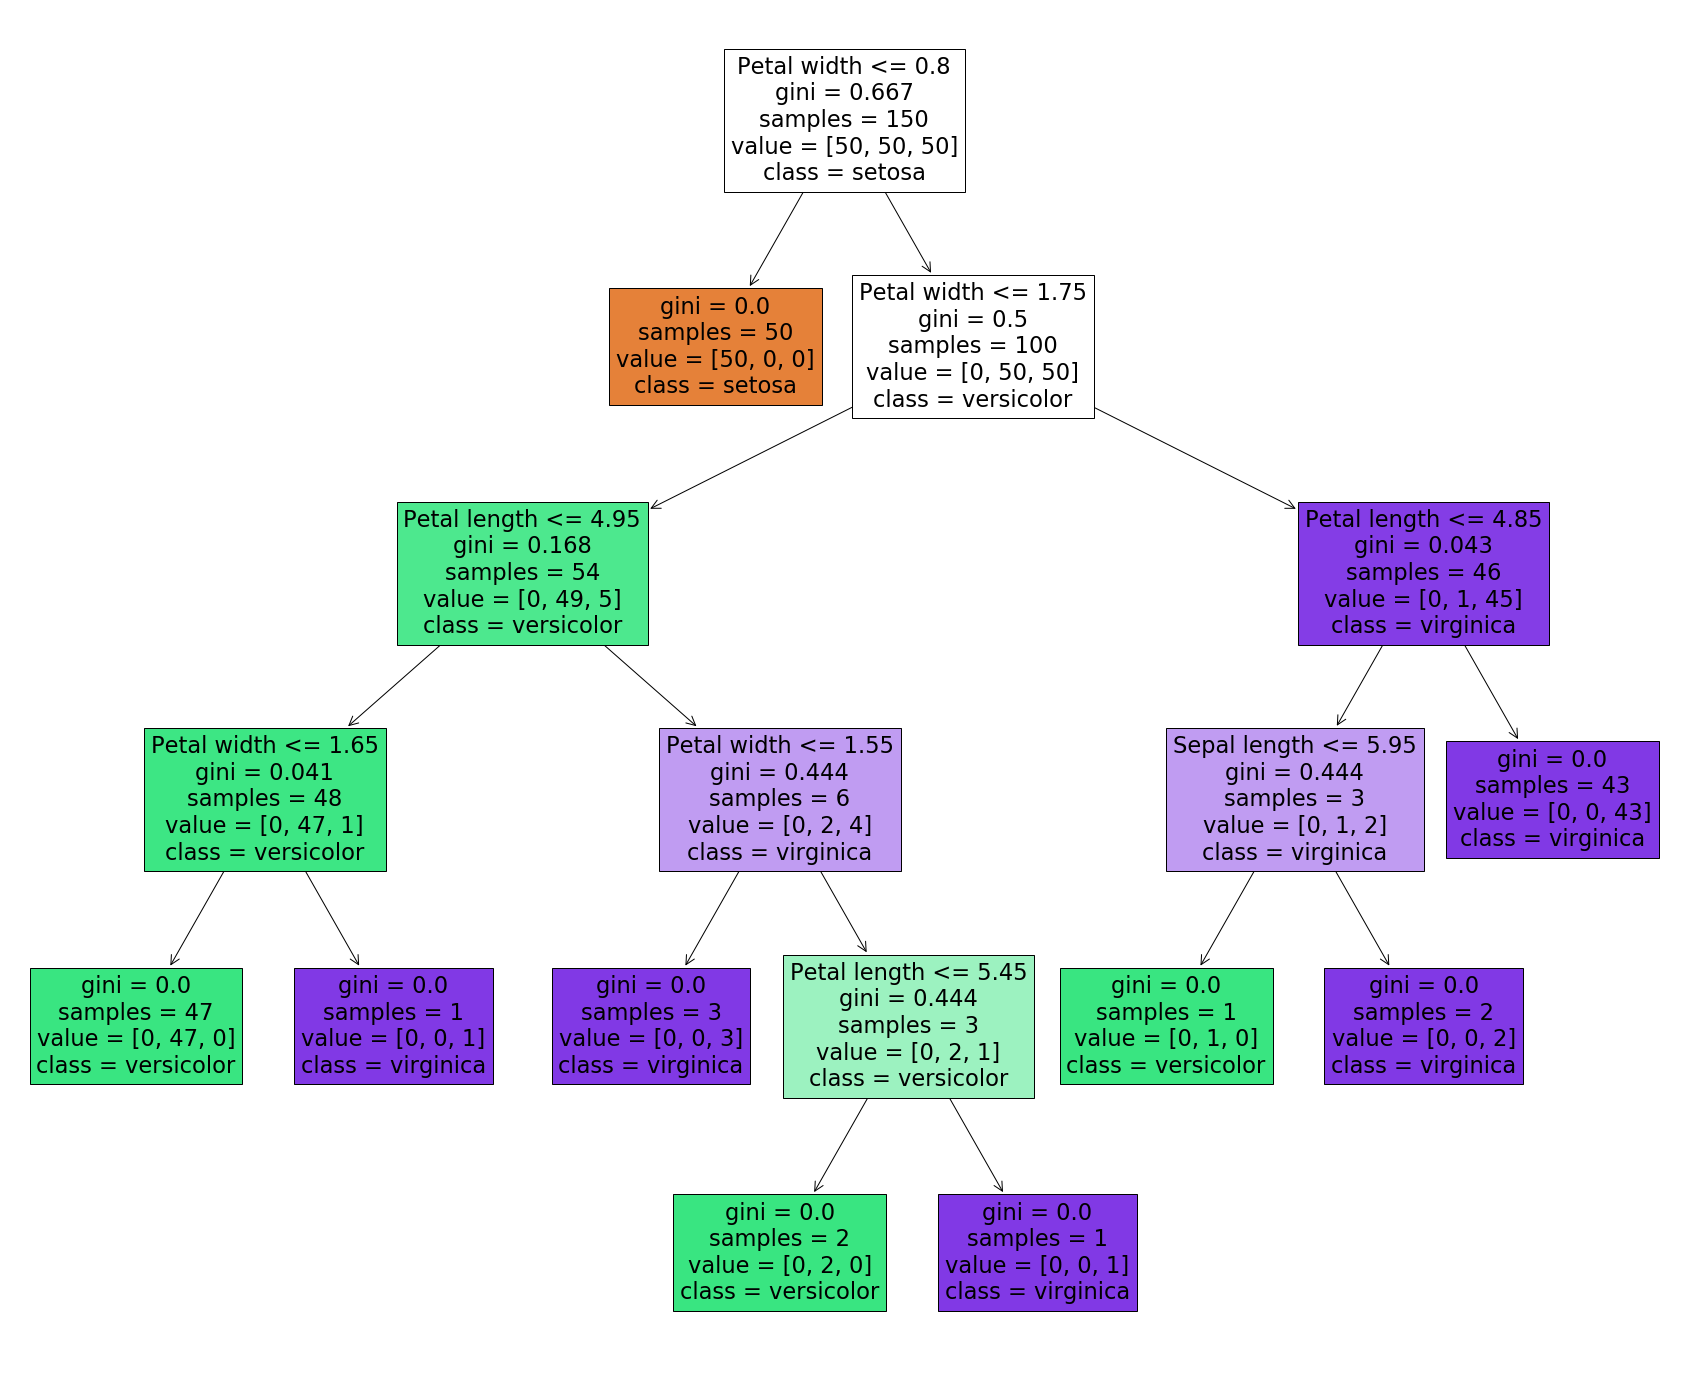

In [30]:
fig = plt.figure(figsize=(30,25))
tree.plot_tree(classifier,feature_names=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'],\
               class_names=['setosa', 'versicolor' , 'virginica'],filled=True)
plt.show()
fig.savefig('DecisionTree.png')

### Feeding new data and predicting right class

In [31]:
# Inputs of independent variables
sepal_length = float(input('SepalLengthCm = '))
sepal_width = float(input('SepalWidthCm   = '))
petal_length = float(input('PetalLengthCm = '))
petal_width = float(input('PetalWidthCm   = '))

SepalLengthCm = 4.5
SepalWidthCm   = 5.6
PetalLengthCm = 1.9
PetalWidthCm   = 0.2


In [32]:
# Independent matrix 
X_classify = np.array([sepal_length, sepal_width, petal_length, petal_width]).reshape(1,-1)
print(f"\nX = {X_classify}")


X = [[4.5 5.6 1.9 0.2]]


In [33]:
# Predict the right class
y_classified = classifier.predict(X_classify)
y_classified

array([0])

**AS**

|Iris-setosa|Iris-versicolor|Iris-virginica|
|----|----|----|
|0|1|2|

### Our input data

|sepal length|sepal width|petal length | petal width |
|----|----|----|----|
|4.5 cm|5.6 cm|1.9 cm|0.2 cm|

### Results
Predicted class is "Iris-Setosa".

# Thank you